<a href="https://colab.research.google.com/github/nickpittman/In-Class/blob/main/11_2_In_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 17 Perceptron and SGD


In [ ]:
from google.colab import drive
import pandas
drive.mount('/content/drive')
iris_data = pandas.read_csv('/content/drive/MyDrive/Datasets/irisData.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#create dummy variables for species in Iris data
iris_dummies = pandas.get_dummies(iris_data, columns = ['species'])
iris_dummies.head()

,sepal length,sepal width,petal length,petal width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [ ]:
### use a Perceptron to predict if an iris is a Setosa

import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import metrics


#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")

# get "dummy" variables for species
iris_dummies = pandas.get_dummies(iris_data, columns = ['species'])
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species_Iris-setosa"

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(iris_dummies[predictors], iris_dummies[target], test_size = 0.2, random_state=41)

#load up scikit-learn Perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
iris_perc_predictions = perc.predict(test_data)

#output accuracy
print("Setosa accuracy:", metrics.accuracy_score(test_sln, iris_perc_predictions))

Setosa accuracy: 1.0


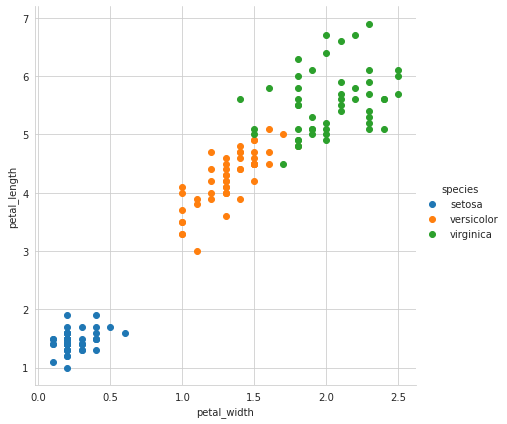

In [ ]:
#let's take a look at the data:
import seaborn as sns
import matplotlib.pyplot as plt
 
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'petal_width',
                              'petal_length').add_legend()


# In class Exercise 1:
- Given the example for species_Iris-setosa, how does Perceptron do for:
  - species_Iris-virginica
  - species_Iris-versicolor
- Do you expect these to also give 100% accuracy? Why or why not?

I do not expect 100% accuracy. These variables are not linearly seperable, therefore a perceptron will not perform well.

In [ ]:
# Code for testing the accuracy of species_Iris-virginica using a Perceptron
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species_Iris-virginica"

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(iris_dummies[predictors], iris_dummies[target], test_size = 0.2, random_state=41)

#load up scikit-learn Perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
virgin_perc_predictions = perc.predict(test_data)

#output accuracy
print("Virginica accuracy:", metrics.accuracy_score(test_sln, virgin_perc_predictions))

Virginica accuracy: 0.6666666666666666


In [ ]:
# Code for testing the accuracy of species_Iris-versicolor using a Perceptron
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species_Iris-versicolor"

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(iris_dummies[predictors], iris_dummies[target], test_size = 0.2, random_state=41)

#load up scikit-learn Perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
versi_perc_predictions = perc.predict(test_data)

#output accuracy
print("Versicolor accuracy:", metrics.accuracy_score(test_sln, versi_perc_predictions))

Versicolor accuracy: 0.6333333333333333


# Boston Housing Dataset:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's

In [ ]:
#Boston Housing Data

from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas
data = pandas.read_csv('/content/drive/MyDrive/Datasets/boston_housing.csv') 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


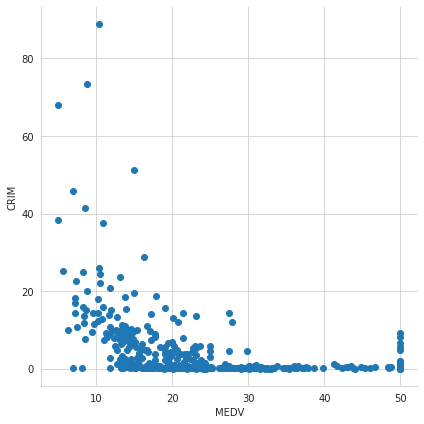

In [ ]:
## Play around with plotting different predictor variables
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(data,height = 6).map(plt.scatter,'MEDV','CRIM')

# In-class Exercise 2:
- Find a Gradient Descent Algorithm on scikit-learn
  - Hint: Stochastic Gradient Descent (SGD)
- Apply it to the Boston Housing Market Dataset
- Utilize a metric to determine how well the algorithm is doing
- Consider reading the user's guide if the results don't make sense
- Can you plot the results of the MSE v Epochs?

In [ ]:
# Code using SGD on Boston Housing Dataset:
from sklearn.linear_model import SGDRegressor
predictors = data.columns.drop('MEDV')
target = 'MEDV'

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

#load up scikit-learn SGD Regressor
SGD = SGDRegressor()
SGD.fit(train_data,train_sln)
SGD_predictions = SGD.predict(test_data)

#output accuracy
print("SGD r squared:", metrics.r2_score(test_sln, SGD_predictions))
print("SGD MAE: ", metrics.mean_absolute_error(test_sln, SGD_predictions))
print("SGD MSE: ", metrics.mean_squared_error(test_sln, SGD_predictions))

SGD r squared: -1.584554268741017e+27
SGD MAE:  251588531409069.1
SGD MSE:  7.357231680077693e+28


In [ ]:
#Normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

#load up scikit-learn SGD Regressor
SGD2 = SGDRegressor()
SGD2.fit(train_data_normalized,train_sln)
SGD2_predictions = SGD2.predict(test_data_normalized)

#output accuracy
print("SGD r squared:", metrics.r2_score(test_sln, SGD2_predictions))
print("SGD MAE: ", metrics.mean_absolute_error(test_sln, SGD2_predictions))
print("SGD MAE: ", metrics.mean_squared_error(test_sln, SGD2_predictions))

SGD r squared: 0.5211780077531174
SGD MAE:  3.386691734766266
SGD MAE:  22.232146919623453


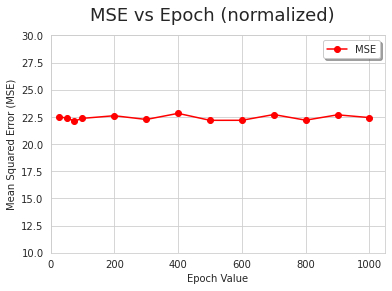

In [ ]:
# Plot the results of the MSE v Epochs
import matplotlib.pyplot as plt

iterations = [25,50,75,100,200,300,400,500,600,700,800,900,1000]
epoch_MSE = []
for i in iterations:
  SGD = SGDRegressor(max_iter=i)
  SGD.fit(train_data_normalized, train_sln)
  SGD_predictions = SGD.predict(test_data_normalized)
  mse = metrics.mean_squared_error(test_sln, SGD_predictions)
  epoch_MSE.append(mse)

plt.suptitle('MSE vs Epoch (normalized)',fontsize=18)
plt.xlabel('Epoch Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.plot(iterations,epoch_MSE,'ro-',label='MSE')
plt.legend(loc='best', shadow=True)
plt.axis([0,1050,10,30])
plt.show()